<a href="https://colab.research.google.com/github/AntonioGagno/blog-snips/blob/main/c_pia_de_fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal, fftpack
import seaborn as sns

%matplotlib inline

In [ ]:
!rm -rf logs/func

Prepare the notebook by downloading the current.csv file. This way it can run on Google colab.

In [ ]:
# download current.csv into the main directory
#!wget 'https://raw.githubusercontent.com/tvhahn/blog-snips/main/2020.10.07_data_driven_methods/current.csv'
#!wget 'https://raw.githubusercontent.com/gsflor/lepac-python/main/current.CSV'
#!wget 'https://raw.githubusercontent.com/gsflor/lepac-python/main/CurrentFFTexCSV.CSV'
!wget 'https://raw.githubusercontent.com/gsflor/lepac-python/main/CurrentFFTmotor1aCSV.CSV'
#dataset = np.genfromtxt("current.CSV", delimiter=',')
#dataset = np.genfromtxt('https://raw.githubusercontent.com/tvhahn/blog-snips/main/2020.10.07_data_driven_methods/current.csv', delimiter=',')
#dataset = np.genfromtxt('https://raw.githubusercontent.com/gsflor/lepac-python/main/current.CSV', delimiter=',')
#dataset = np.genfromtxt('https://raw.githubusercontent.com/gsflor/lepac-python/main/CurrentFFTexCSV.CSV', delimiter=',')
dataset = np.genfromtxt('https://raw.githubusercontent.com/gsflor/lepac-python/main/CurrentFFTmotor1aCSV.CSV', delimiter=',')

print(dataset)

--2022-10-12 17:59:51--  https://raw.githubusercontent.com/gsflor/lepac-python/main/CurrentFFTmotor1aCSV.CSV
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8127 (7.9K) [text/plain]
Saving to: ‘CurrentFFTmotor1aCSV.CSV’

CurrentFFTmotor1aCS 100%[===================>]   7.94K  --.-KB/s    in 0s      

2022-10-12 17:59:51 (77.4 MB/s) - ‘CurrentFFTmotor1aCSV.CSV’ saved [8127/8127]

[  nan -195. -216. ...  205.  183.  162.]


dataset aqui
[  nan -195. -216. ...  205.  183.  162.]
1521


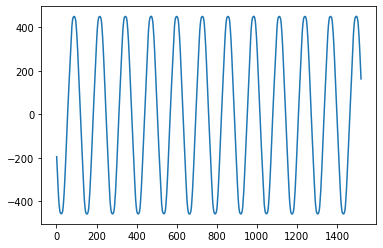

df aqui
      current
0        -195
1        -216
2        -237
3        -258
4        -278
...       ...
1515      247
1516      226
1517      205
1518      183
1519      162

[1520 rows x 1 columns]
Y aqui
[-195. -216. -237. ...  205.  183.  162.]
X aqui
[0.00000000e+00 1.30294053e-04 2.60588106e-04 ... 1.97656079e-01
 1.97786373e-01 1.97916667e-01]


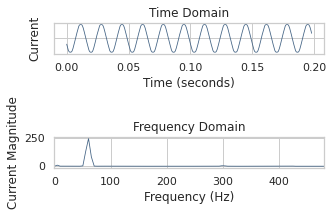

In [ ]:
##PLOTA A SENOIDE DO ARQUIVO EnsaioMotorCSV1ax1.csv COMO DATASET, PORÉM NameError: name 'df' is not defined

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal, fft
import seaborn as sns


filepath = "drive/MyDrive/Dados_CSV_2/"

ponto_inicial = 1
ponto_final   = 100

#print(np.ones((780,1)))
#loading the dataset 
#dataset = np.genfromtxt(filepath+"I_M1_K2.mat.csv", delimiter=',')
dataset = np.genfromtxt("CurrentFFTmotor1aCSV.CSV", delimiter=',')
#dataset = np.genfromtxt("EnsaioMotorCSV1a.csv", delimiter=',')
#print(dataset)
dataset0 = dataset.astype(float)
#dataset0 = dataset0[ponto_inicial:ponto_final]
print("dataset aqui")
print(dataset0)
print(dataset0.size)
plt.plot(dataset0)
plt.show()
###dataset0 = np.concatenate((np.reshape(dataset0,(qtd_amostras, amostras)), np.ones((qtd_amostras,1))),axis=1)

df = pd.read_csv("CurrentFFTmotor1aCSV.CSV", index_col=False)

print("df aqui")
print(df)

##------------------------------------------------------------------------------------
# load the current data from a csv
df = pd.read_csv("CurrentFFTmotor1aCSV.CSV", index_col=False)
#df = pd.read_csv("current.csv", index_col=False)
y = df["current"].to_numpy(dtype="float64")  # convert to a numpy array

print("Y aqui")
print(y)

# setup the seaborn plot
sns.set(font_scale=1.0, style="whitegrid")
fig, axes = plt.subplots(2, 1)
fig.tight_layout(pad=5.0)

pal = sns.cubehelix_palette(6, rot=-0.25, light=0.7)  # pick nice color for plot

# parameters for plot
T = 1.0 / 7680.0  # sample spacing
N = len(y)  # number of sample points
x = np.linspace(0.0, N * T, N)

print("X aqui")
print(x)
#plt.plot(x)
#plt.show()

# plot time domain signal
axes[0].plot(x, y, marker="", label="Best model", color=pal[3], linewidth=0.8)
axes[0].set_title("Time Domain")
axes[0].set_xlabel("Time (seconds)")
axes[0].set_ylabel("Current")
axes[0].set_yticklabels([])

# do some preprocessing of the current signal
y = signal.detrend(y, type == "constant")  # detrended signal
y *= np.hamming(N)  # apply a hamming window. Why? https://dsp.stackexchange.com/a/11323


# FFT on time domain signal
yf = fft.rfft(y)
yf = 2.0 / N * np.abs(yf[: int(N / 2.0)])
xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
#print(xf)
#print(yf)

# plot the frequency domain signal
axes[1].plot(xf, yf, marker="", label="Best model", color=pal[3], linewidth=0.8)
plt.xlim([0, 480])
axes[1].set_title("Frequency Domain")
#axes[1].set_title("Frequency Domain", fontdict={"fontweight": "normal"})
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Current Magnitude")
plt.show()


# clean up the sub-plots to make everything pretty
for ax in axes.flatten():
    ax.yaxis.set_tick_params(labelleft=True, which="major")
    ax.grid(False)
#plt.show()
# in case you want to save the figure (just uncomment)
# plt.savefig('time_freq_domains.svg',dpi=600,bbox_inches = "tight")

